### Install Libraries

In [12]:
import pandas as pd
import matplotlib.pylab as plt
import plotly.express as px
import yfinance as yf
import numpy as np
from scipy.stats import boxcox

plt.rcParams['figure.figsize']=(20,10)
plt.style.use('seaborn')

### Download Data - Petrobras

Our data are based on shares of the company Petróleo Brasileiro S.A. — Petrobras (PETR4.SA). 

In [13]:
series_petr4 = yf.download("PETR4.SA", start="2015-01-01", end="2020-10-02")

[*********************100%***********************]  1 of 1 completed


In [14]:
series_petr4.head(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,9.99,9.99,9.35,9.36,8.683293,49559500
2015-01-05,9.14,9.19,8.53,8.56,7.941135,78385100
2015-01-06,8.71,8.83,8.04,8.28,7.681378,84723300
2015-01-07,8.56,8.73,8.36,8.67,8.043181,85531000
2015-01-08,8.79,9.39,8.74,9.23,8.562695,83306300


#### Time Series Visualization
#### OPEN

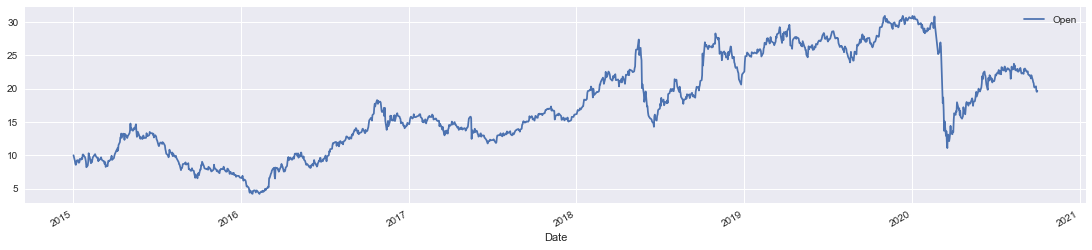

In [15]:
series_petr4[["Open"]].plot(figsize = (19, 4)) 
plt.show()

### Exploratory Analysis - Distribution Analysis

Histogram graph plot to evaluate if data has a bell shape distribution (Gaussian Distribution).

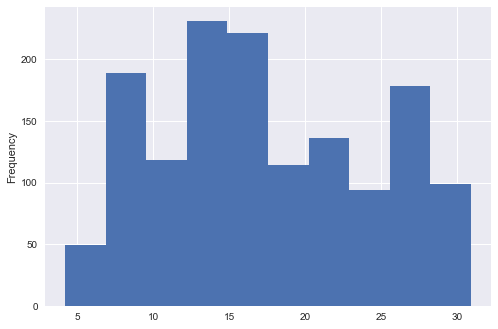

In [16]:
series_petr4["Open"].plot(kind="hist")
plt.show()

### Test - Augmented Dickey-Fuller

Statistical tests make strongs supositions about your data. They only can be used to inform the extent to which the null hypothesis can be rejected or fail to be rejected. The result must be interpreter for a given problem to be significant.

However, they can be provide a quickly verification and confirmatory evidences that your time series <b>is stationary or not.</b>The test <b>Augmented Dickey-Fuller</b> is a type of a statistical test that is very useful for this kind of analysis

<br>
<hr>
<br>
<b>Null Hypothesis (H0)</b> : If don't be rejected, suggests that time series has a unit root, which means that it's not stationary. There is some structure dependent of time.<br><br>

<b>Alternative Hypothesis (H1)</b> : the null hypothesis is rejected; suggests that the time series doesn't have a unit root, which means it's stationary. There isn't structure dependent of time.

<br>
<hr>
<br>
<b>We interpreter this result using p-value of test. One p-value below a limit (as 5% or 1%) suggests that we should reject the null hypothesis (stationary); otherwise, a p-value above suggests that we fail in reject the null hypothesis (non-stationary).</b>
<br><br>
<ul>
<li><b>p-value > 0,05</b> : fail in reject the null hypothesis (H0), the data has a unit root and are <b>not stationary.</b></li>

<li><b>p-value <= 0,05</b> : reject the null hypothesis (H0), the data doesn't have a unit root and are <b> stationary.</b></li>
</ul>

<br>
<hr>
<br>
Below is an example of the test <b>Augmented Dickey-Fuller</b> in stock data from Petrobras. The librarie <b>statsmodels</b> provides the function <b>adfuller()</b> that implements the test.

In [17]:
from statsmodels.tsa.stattools import adfuller

X = series_petr4["Open"]

result = adfuller(X)

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -2.056293
p-value: 0.262449


The example tell us the statistical value of <b>-2.05</b>.

The more negative this statistic, bigger the likelihood of we reject the null hypothesis (we have a stationary data).

Otherwise, if we don't reject the null hypothesis (we have a stationary data).
<br><hr><br>
Validating p-value we have the value of <b>0.26</b>, that is <br>

<b>Value 0.26 > 0,05</b> : fail to reject the null hypothesis (H0), soon the data has a unit root and <b>are not stationary.</b>

<br>

### Differentiation

In this method, we calculate the difference of consecutive terms in the serie. The differentiation is usually performed to get rid of the variable average. Mathematically, the differentiation can be writen as:

###### Yt = Yt - Y(t-1)

where Yt is the value in instant t

In [18]:
series_petr4['OpenTransform_diff'] = series_petr4['Open'] - series_petr4['Open'].shift(1)
series_petr4['OpenTransform_diff'].dropna(inplace=True)

In [19]:
from statsmodels.tsa.stattools import adfuller

X = series_petr4["OpenTransform_diff"]

result = adfuller(X)

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -11.023033
p-value: 0.000000


### Sazonal Differentiation

In sazonal differentiationNa diferenciação sazonal, instead of calculating the difference between consecutive values, we calculate the difference between an observation and a previous observation from the same station. For example, an observation made on Monday will be subtracted from an observation made on the previous Monday. Mathematically, it can be written as:

###### Yt = Yt - Y(tn)

In [20]:
n = 7
series_petr4['OpenTransform_diff'] = series_petr4['Open'] - series_petr4['Open'].shift(n)
series_petr4['OpenTransform_diff'].dropna(inplace=True)

In [21]:
from statsmodels.tsa.stattools import adfuller

X = series_petr4["OpenTransform_diff"]

result = adfuller(X)

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -7.033806
p-value: 0.000000


#### Transformation - Log with Differentiation

Transformations are used to stabilize the non-constant variation in a series. Common transformation methods include energy transformation, square root, boxcox and log transformation. Let's do a quick log transformation and differentiation on our dataset:

In [22]:
series_petr4['OpenTransform_log'] = np.log(series_petr4['Open'])

series_petr4['OpenTransform_log_diff'] = series_petr4['OpenTransform_log'] - series_petr4['OpenTransform_log'].shift(1)
series_petr4['OpenTransform_log_diff'].dropna(inplace=True)

In [23]:
from statsmodels.tsa.stattools import adfuller

X = series_petr4["OpenTransform_log_diff"]

result = adfuller(X)

print('ADF Statistic: %f' % result[0])

print('p-value: %f' % result[1])

ADF Statistic: -10.106878
p-value: 0.000000


#### Transformation - BoxCox with Differentiation

Transformations are used to stabilize the non-constant variation in a series. Common transformation methods include energy transformation, square root, boxcox and log transformation. Let's do a quick log transformation and differentiation on our dataset:

In [24]:
series_petr4['OpenTransform_boxcox'], lam = boxcox(series_petr4["Open"])
print('Lambda: %f' % lam)

series_petr4['OpenTransform_boxcox_diff'] = series_petr4['OpenTransform_boxcox'] - series_petr4['OpenTransform_boxcox'].shift(1)
series_petr4['OpenTransform_boxcox_diff'].dropna(inplace=True)

Lambda: 0.555261


In [25]:
from statsmodels.tsa.stattools import adfuller

X = series_petr4["OpenTransform_boxcox_diff"]

result = adfuller(X)

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -12.159411
p-value: 0.000000


The best transformation so far has been the BoxCox with Differentiation, as it presented a more negative value of the ADF Statistics.